<a href="https://colab.research.google.com/github/SalimZ04/AICommand/blob/main/Afrique2024_ShotHeatMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsbombpy

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

!pip install mplsoccer

from mplsoccer import Pitch, Sbopen,VerticalPitch

In [ ]:
from statsbombpy import sb
sb.competitions()

competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
67              55         43         Europe               UEFA Euro   
68              35         75         Europe      UEFA Europa League   
69              53        106         Europe       UEFA Women's Euro   
70              72        107  International       Women's World Cup   
71              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                       True   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
67               male              False                       True   
68               male              False                      False   
69             female              False                       True   
70             female              False                       True   
71             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2023/2024  2024-05-21T03:36:44.090970  2024-05-21T03:38:27.534702   
1    2015/2016  2024-05-19T11:11:14.192381                        None   
2         2023  2024-02-28T18:02:23.493027                        None   
3    2018/2019  2024-05-13T13:14:25.239651     2021-06-13T16:17:31.694   
4    2017/2018  2024-02-13T02:35:28.134882     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
67        2020  2024-04-16T12:44:40.558402  2024-04-16T12:47:18.505110   
68   1988/1989  2024-02-12T14:45:05.702250     2021-06-13T16:17:31.694   
69        2022  2024-02-13T13:27:17.178263  2024-02-13T13:30:52.820588   
70        2023  2024-04-05T13:22:08.250209  2024-04-05T13:29:51.562450   
71        2019  2024-02-13T09:41:26.379767     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0   2024-05-21T03:38:27.534702  2024-05-21T03:36:44.090970  
1                         None  2024-05-19T11:11:14.192381  
2                         None  2024-02-28T18:02:23.493027  
3                         None  2024-05-13T13:14:25.239651  
4                         None  2024-02-13T02:35:28.134882  
..                         ...                         ...  
67  2024-04-16T12:47:18.505110  2024-04-16T12:44:40.558402  
68                        None  2024-02-12T14:45:05.702250  
69  2024-02-13T13:30:52.820588  2024-02-13T13:27:17.178263  
70  2024-04-05T13:29:51.562450  2024-04-05T13:22:08.250209  
71                        None  2024-02-13T09:41:26.379767  

[72 rows x 12 columns]

In [ ]:
parser = Sbopen()
df_match = parser.match(competition_id=1267, season_id=107)
#print(df_match)

In [ ]:
path_eff = [path_effects.Stroke(linewidth=2, foreground='white'),
            path_effects.Normal()]
#print(path_eff)

[<matplotlib.patheffects.Stroke object at 0x7974ed80db10>, <matplotlib.patheffects.Normal object at 0x7974ed80d030>]


In [ ]:
def plot_pitch(team):
    match_ids = df_match.loc[(df_match["home_team_name"] == team) | (df_match["away_team_name"] == team)]["match_id"].tolist()

    shots = pd.DataFrame()
    for idx in match_ids:
        #open the event data from this game
        df = parser.event(idx)[0]
        for period in [1, 2]:
            #keep only Shots by England in this period
            mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)
            #keep only necessary columns
            shot = df.loc[mask_shot, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
            shots = pd.concat([shots, shot])

    #plot vertical pitch
    pitch = VerticalPitch(line_zorder=2, line_color='black',
                  pitch_color='#f8f5fa', half = True, goal_type='box', linewidth = 1.25)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    #get the 2D histogram
    bin_statistic = pitch.bin_statistic(shots.x, shots.y, statistic='count', bins=(20, 9), normalize=True)
    #make a heatmap
    pcm  = pitch.heatmap(bin_statistic, cmap='Pastel1', edgecolor='none', ax=ax['pitch'])

    #legend to our plot
    ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
    cbar = plt.colorbar(pcm, cax=ax_cbar)

    labels = pitch.label_heatmap(bin_statistic, color='#111', fontsize=12,
                                 ax=ax['pitch'], ha='center', va='center',
                                 str_format='{:.0%}', path_effects=path_eff
                                )
    fig.set_figwidth(6)
    fig.set_figheight(6)
    fig.suptitle(team, fontsize = 16)
    plt.show()

In [ ]:
participants = df_match.home_team_name.unique()

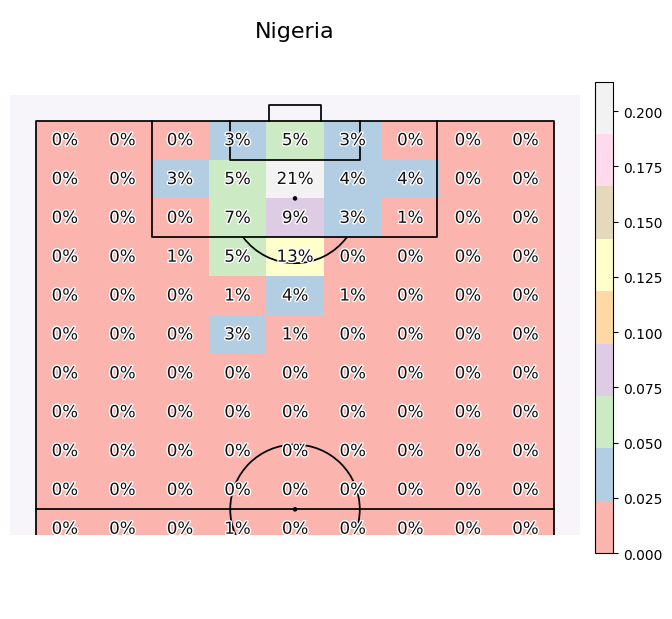

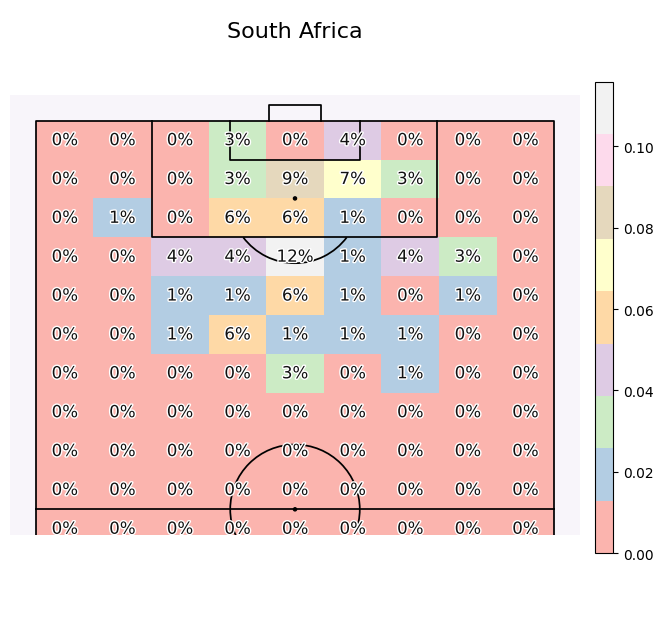

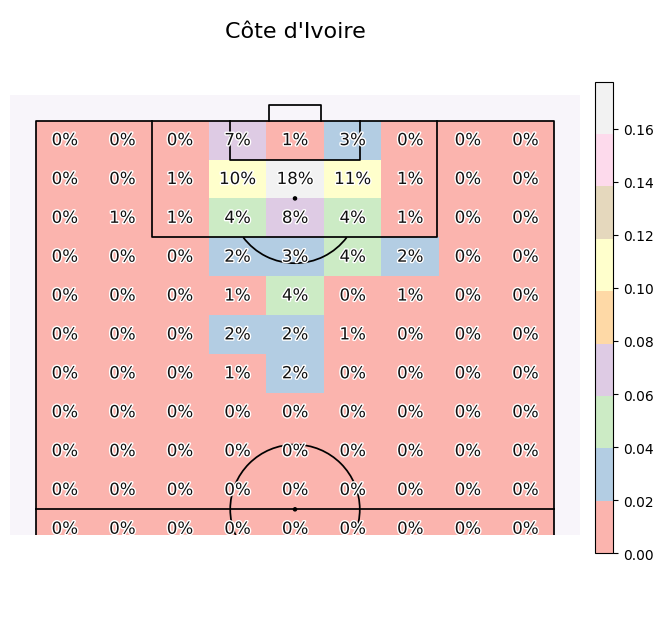

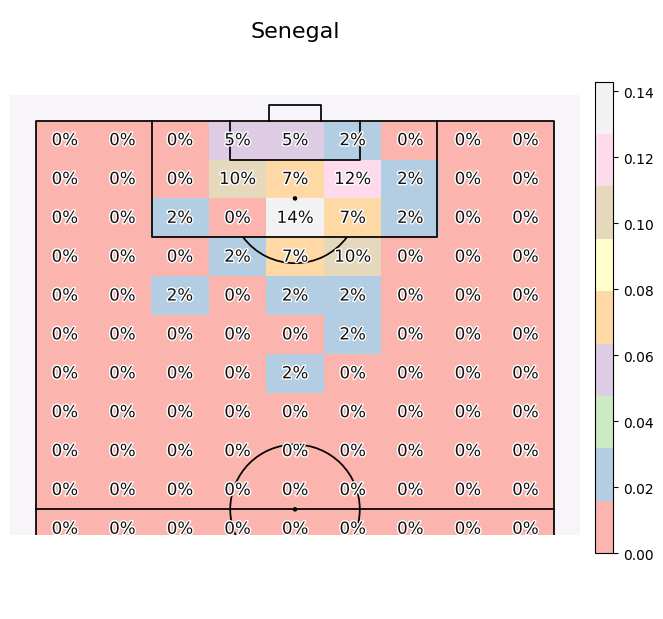

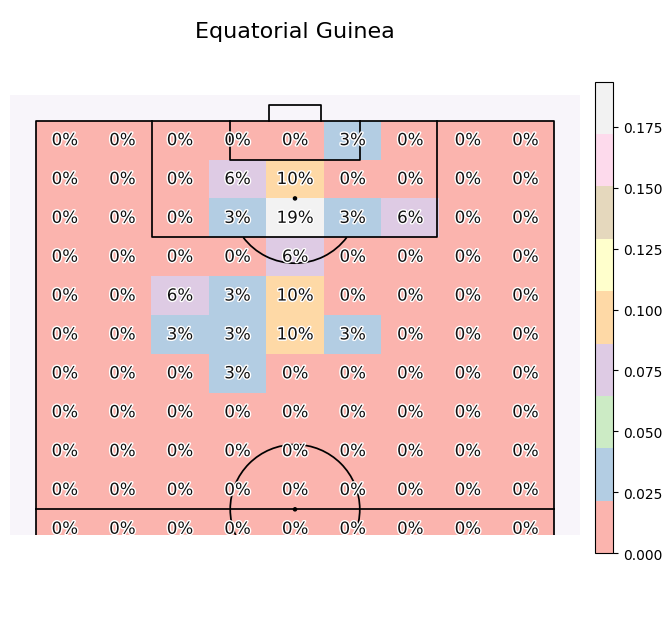

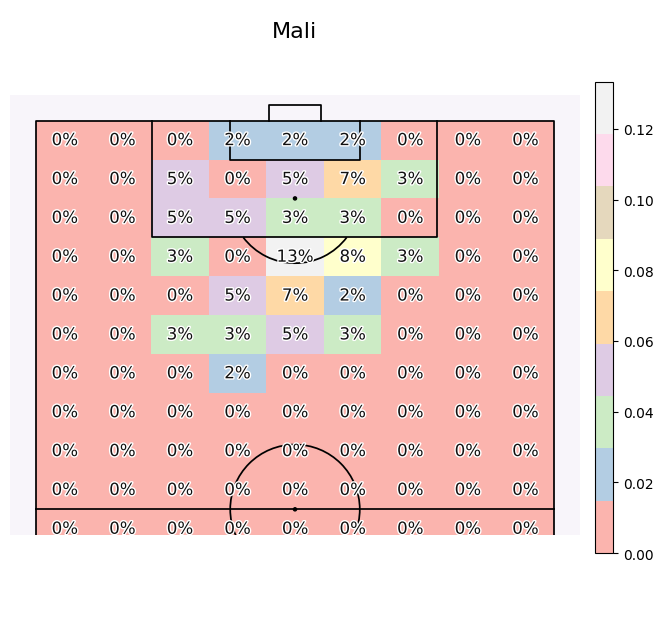

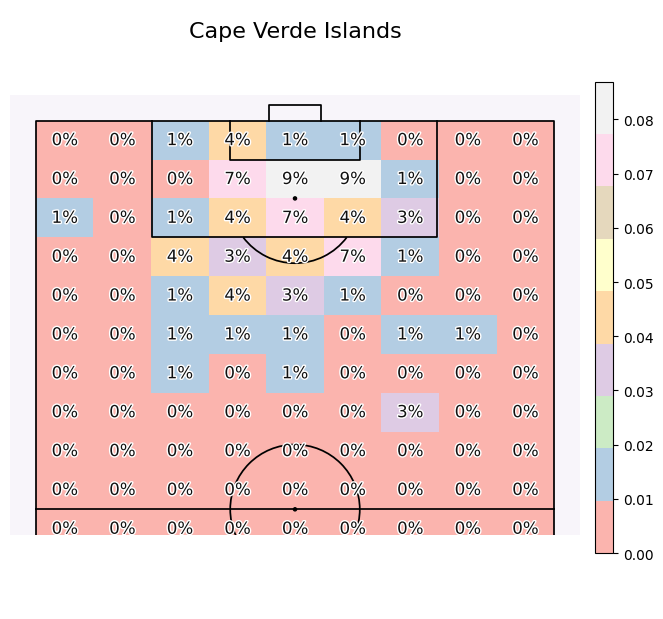

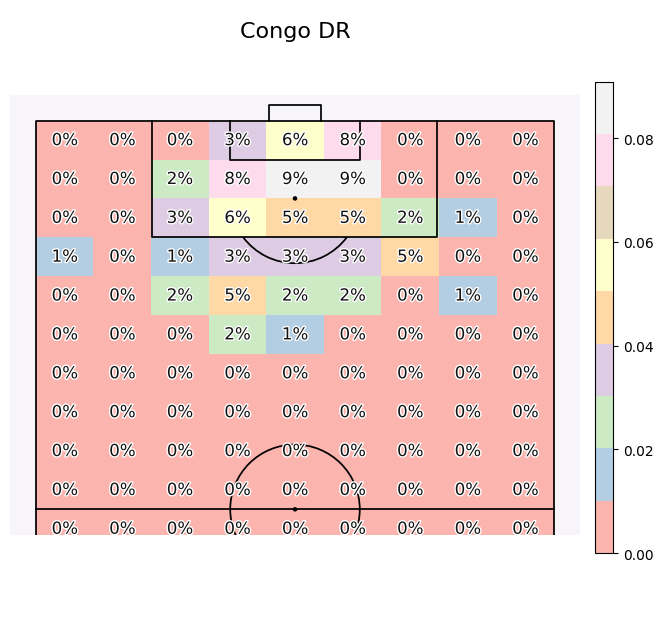

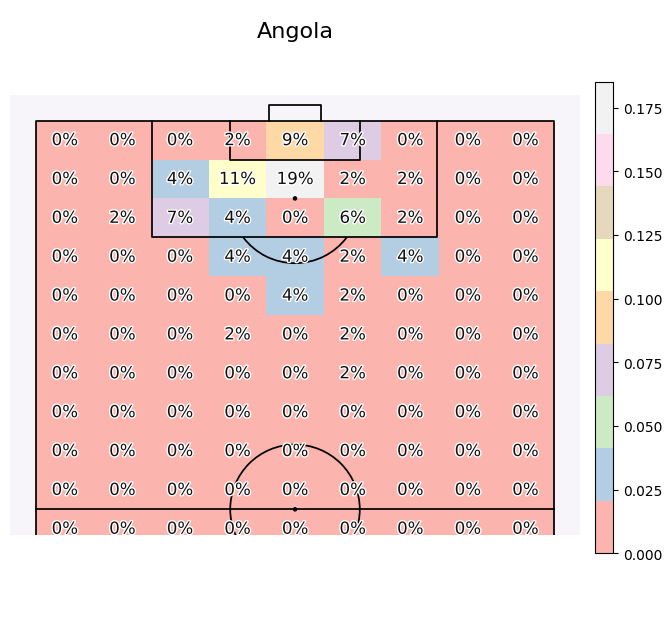

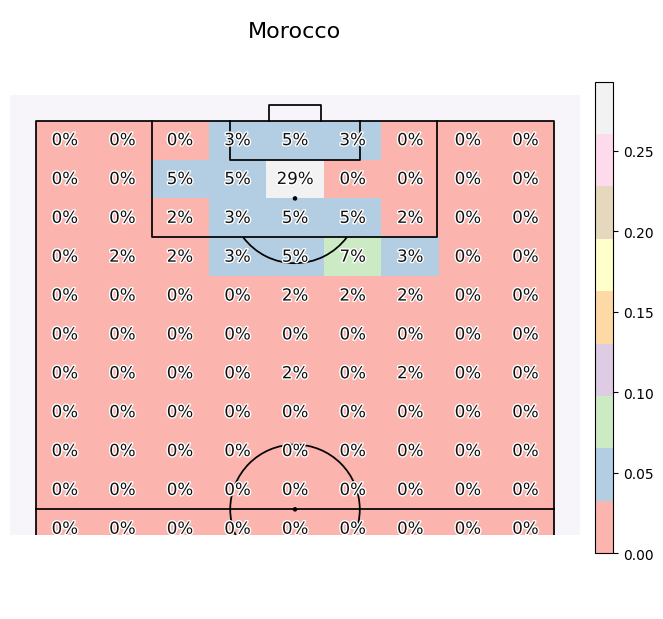

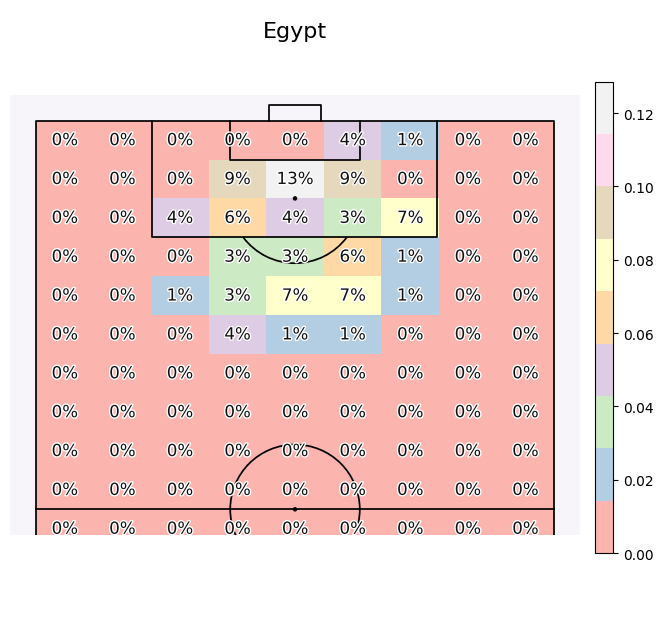

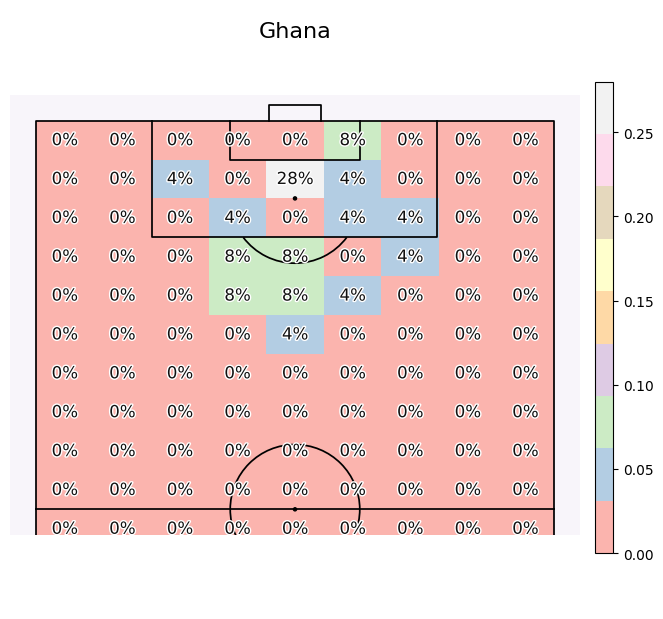

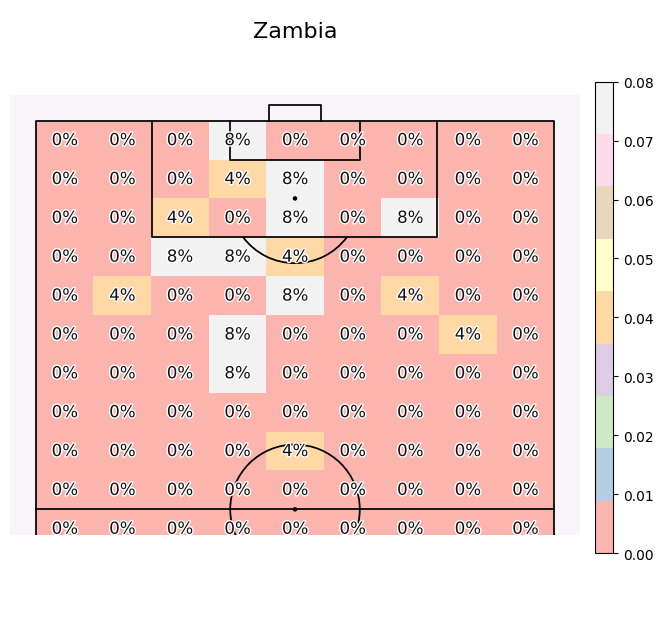

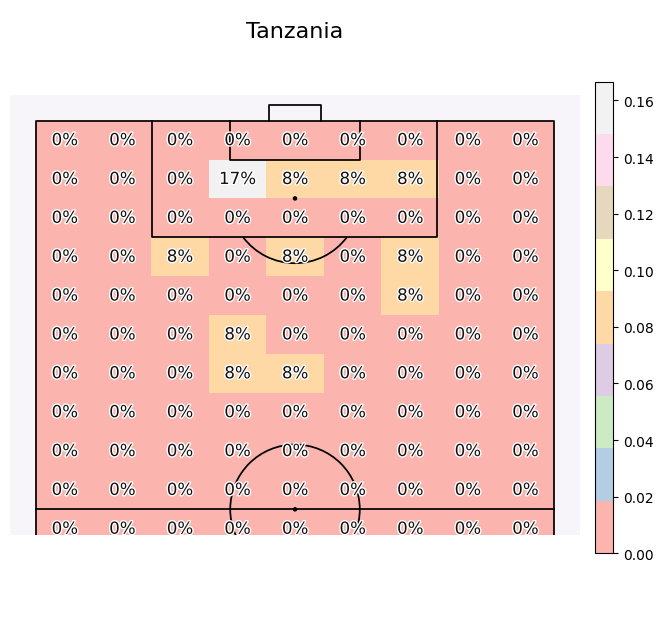

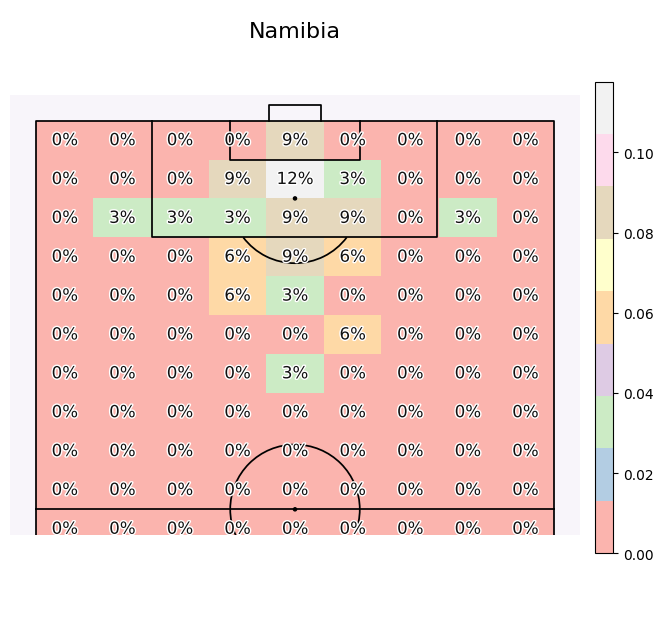

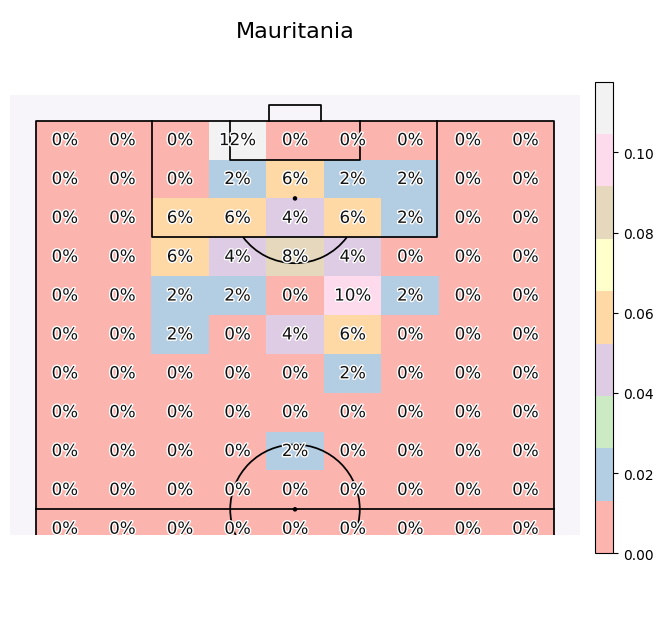

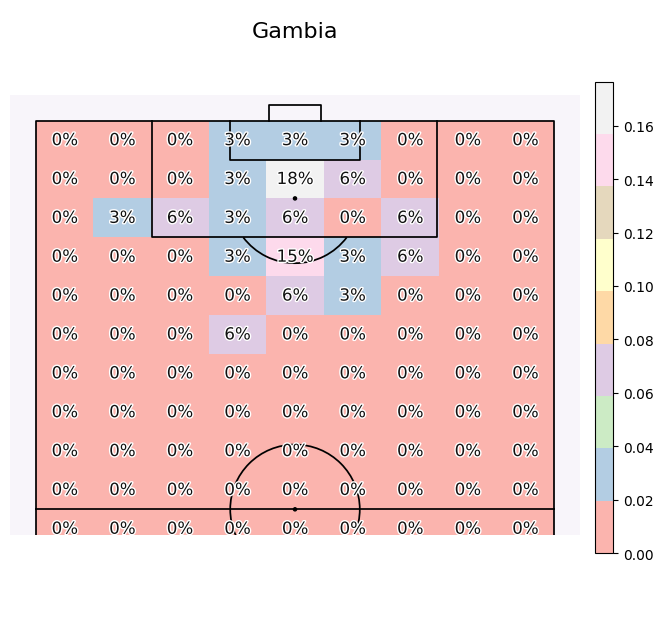

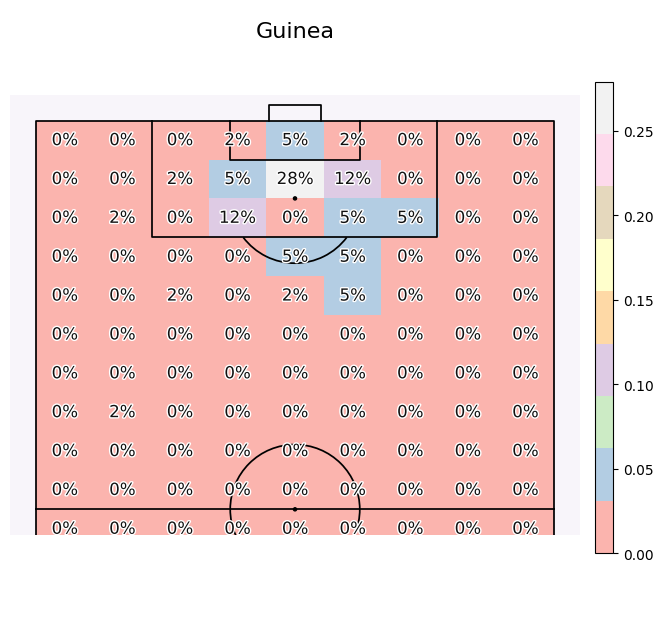

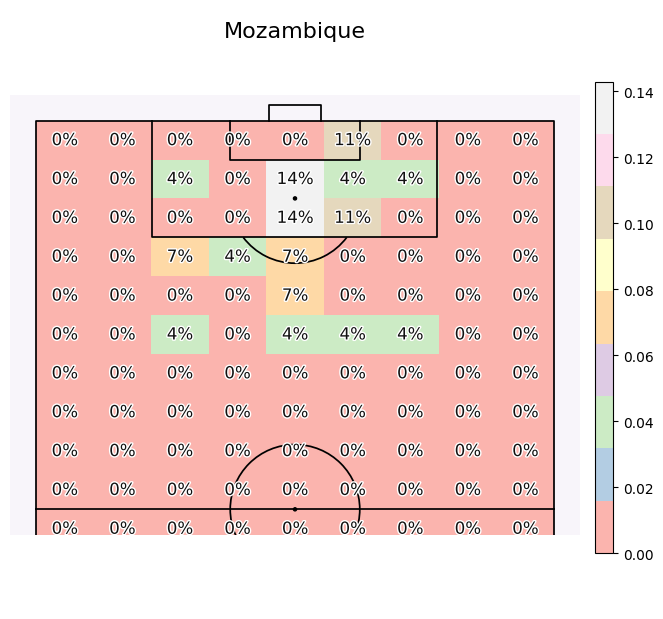

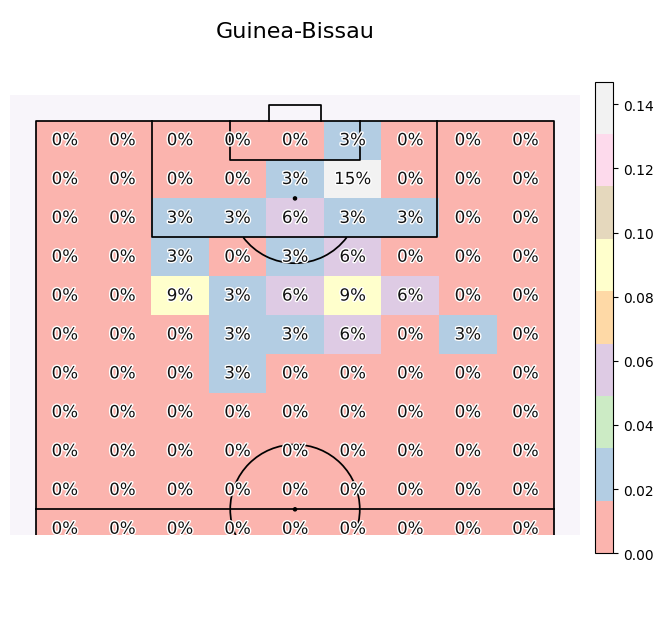

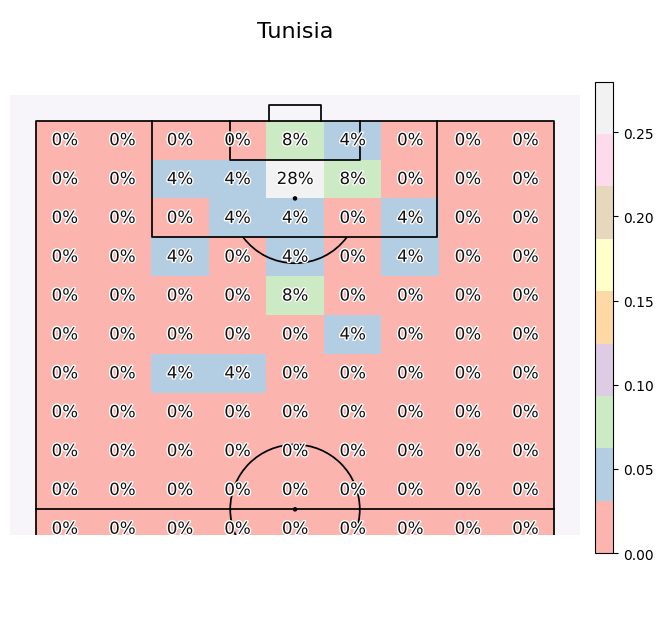

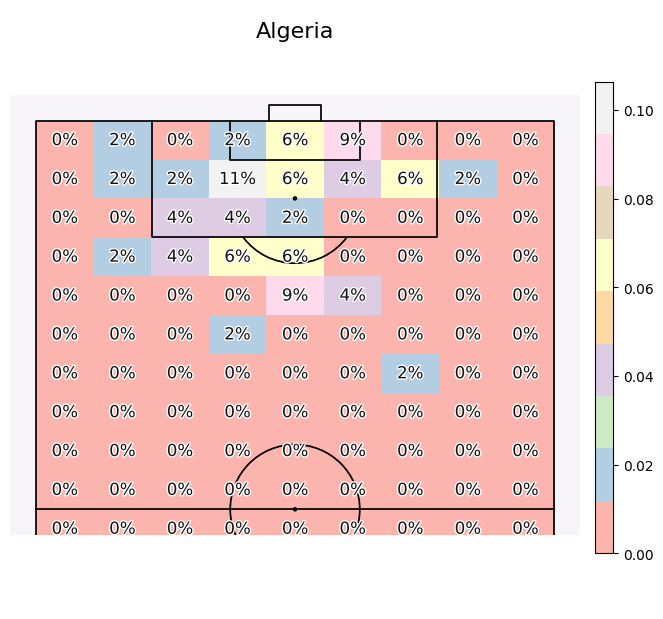

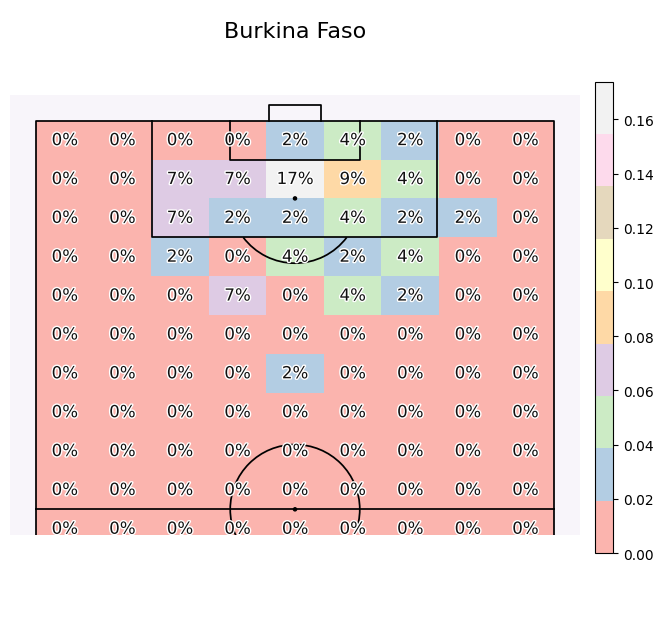

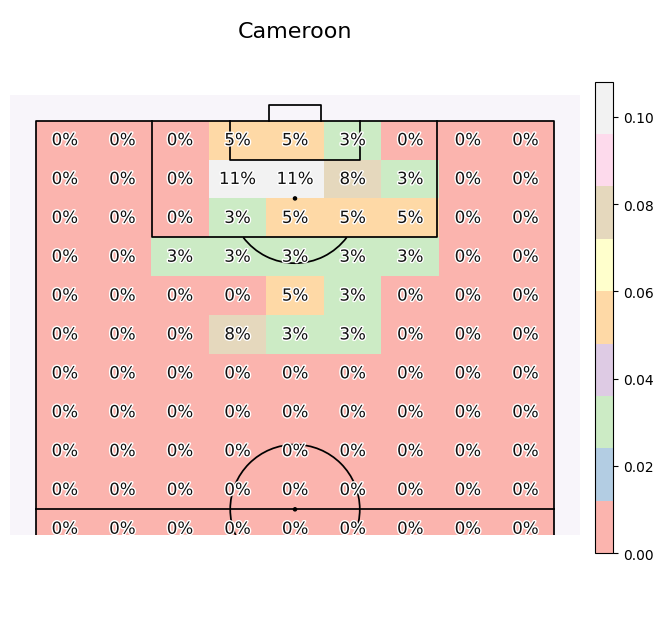

In [ ]:
for country in participants:
    plot_pitch(country)